# Inicialización

¡Bienvenido a la primera tarea de Mejora de las Redes Neuronales Profundas!

El entrenamiento de su red neuronal requiere especificar un valor inicial de los pesos. Un método de inicialización bien elegido ayuda al proceso de aprendizaje.

Si has completado el curso anterior de esta especialización, probablemente has seguido las instrucciones para la inicialización de los pesos, y has visto que ha funcionado bastante bien hasta ahora. Pero, ¿cómo elegir la inicialización para una nueva red neuronal? En este cuaderno, probarás algunas inicializaciones diferentes, incluyendo la aleatoria, los ceros y la inicialización de He, y verás cómo cada una de ellas conduce a resultados diferentes.

Una inicialización bien elegida puede
- Acelerar la convergencia del descenso de gradiente
- Aumentar las probabilidades de que el descenso de gradiente converja a un error de entrenamiento (y de generalización) menor 

¡Empecemos!

## Table of Contents
- [1 - Packages](#1)
- [2 - Loading the Dataset](#2)
- [3 - Neural Network Model](#3)
- [4 - Zero Initialization](#4)
    - [Exercise 1 - initialize_parameters_zeros](#ex-1)
- [5 - Random Initialization](#5)
    - [Exercise 2 - initialize_parameters_random](#ex-2)
- [6 - He Initialization](#6)
    - [Exercise 3 - initialize_parameters_he](#ex-3)
- [7 - Conclusions](#7)

<a name='1'></a>
## 1 - Packages

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from public_tests import *
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a name='2'></a>
## 2 - Loading the Dataset

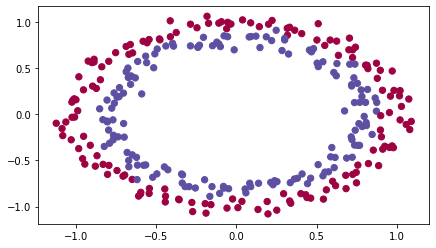

In [24]:
train_X, train_Y, test_X, test_Y = load_dataset()

Para este clasificador, se quiere separar los puntos azules de los rojos.

<a name='3'></a>
## 3 - Neural Network Model 

Utilizarás una red neuronal de 3 capas (ya implementada para ti). Estos son los métodos de inicialización con los que experimentarás: 
- Inicialización en ceros* -- estableciendo `inicialización = "ceros"` en el argumento de entrada.
- Inicialización aleatoria* -- estableciendo `inicialización = "aleatoria"` en el argumento de entrada. Esto inicializa los pesos a valores aleatorios grandes.  
- Inicialización he* -- estableciendo `inicialización = "he"` en el argumento de entrada. Esto inicializa los pesos a valores aleatorios escalados de acuerdo con un artículo de He et al., 2015. 

**Instrucciones**: Instrucciones: Lee el código de abajo y ejecútalo. En la siguiente parte, implementarás los tres métodos de inicialización a los que llama este `model()`.

In [25]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    """
    Implementa una red neuronal de tres capas: LINEAL->RELU->LINEAL->RELU->LINEAL->SIGMOIDE.
    
    Argumentos:
    X -- datos de entrada, de forma (2, número de ejemplos)
    Y -- vector "etiqueta" verdadera (que contiene 0 para los puntos rojos; 1 para los puntos azules), de forma (1, número de ejemplos)
    learning_rate -- tasa de aprendizaje para el descenso de gradiente 
    num_iterations -- número de iteraciones para ejecutar el descenso de gradiente
    print_cost -- si es True, imprime el coste cada 1000 iteraciones
    initialization -- bandera para elegir qué inicialización usar ("ceros", "aleatorio" o "él")
    
    Devuelve:
    parameters -- parámetros aprendidos por el modelo
    """
        
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Loop (gradient descent)

    for i in range(num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

<a name='4'></a>
## 4 - Zero Initialization

Hay dos tipos de parámetros a inicializar en una red neuronal:
- Las matrices de pesos $(W^{[1]}, W^{[2]}, W^{[3]}, ..., W^{[L-1]}, W^{[L]})$
- los vectores de sesgo $(b^{[1]}, b^{[2]}, b^{[3]}, ..., b^{[L-1]}, b^{[L]})$

<a name='ex-1'></a>
### Exercise 1 - initialize_parameters_zeros

Implementa la siguiente función para inicializar todos los parámetros a ceros. Más adelante verás que esto no funciona bien ya que no "rompe la simetría", pero inténtalo de todas formas y mira lo que pasa. Use `np.zeros((..,..))` con las formas correctas.

In [26]:
def initialize_parameters_zeros(layers_dims):
    """
    Argumentos:
    layer_dims -- array python (lista) que contiene el tamaño de cada capa.
    
    Devuelve:
    parameters -- diccionario python que contiene sus parámetros "W1", "b1", ..., "WL", "bL":
                    W1 -- matriz de pesos de la forma (layers_dims[1], layers_dims[0])
                    b1 -- vector de sesgo de la forma (layers_dims[1], 1)
                    ...
                    WL -- matriz de pesos de la forma (layers_dims[L], layers_dims[L-1])
                    bL -- vector de sesgo de la forma (layers_dims[L], 1)
    """
    
    parameters = {}
    L = len(layers_dims)            # numeros de capas
    
    for l in range(1, L):
        
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
        
    return parameters

In [27]:
parameters = initialize_parameters_zeros([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
initialize_parameters_zeros_test(initialize_parameters_zeros)


W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]
 All tests passed.


Ejecute el siguiente código para entrenar su modelo en 15.000 iteraciones utilizando la inicialización en ceros.

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


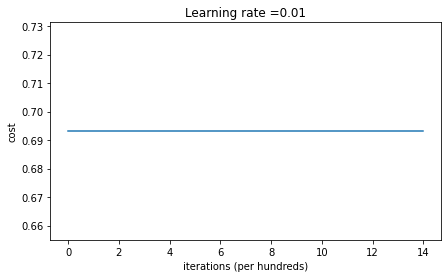

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [28]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

El rendimiento es terrible, el coste no disminuye y el algoritmo no rinde más que la adivinación aleatoria. ¿Por qué? Mira los detalles de las predicciones y el límite de decisión:

In [29]:
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


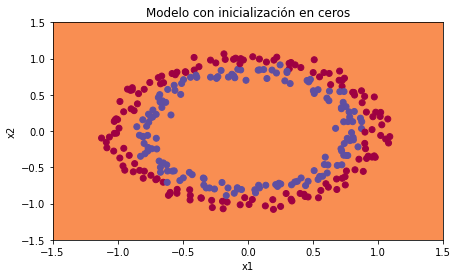

In [30]:
plt.title("Modelo con inicialización en ceros")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Nota**: En aras de la simplicidad, los cálculos que se realizan a continuación se hacen utilizando sólo un ejemplo a la vez.

Como los pesos y los sesgos son cero, al multiplicar por los pesos se crea el vector cero que da 0 cuando la función de activación es ReLU. Comos `z = 0`

$$a = ReLU(z) = max(0, z) = 0$$

En la capa de clasificación, donde la función de activación es sigmoidea, se obtiene (para cualquier entrada): 

$$\sigma(z) = \frac{1}{ 1 + e^{-(z)}} = \frac{1}{2} = y_{pred}$$

Como para cada ejemplo se obtiene una probabilidad de 0,5 de que sea cierto, nuestra función de costes se vuelve impotente para ajustar las ponderaciones.

Su función de pérdida:
$$ \mathcal{L}(a, y) =  - y  \ln(y_{pred}) - (1-y)  \ln(1-y_{pred})$$

Para `y=1`, `y_pred=0.5` se convierte en:

$$ \mathcal{L}(0, 1) =  - (1)  \ln(\frac{1}{2}) = 0.6931471805599453$$

Pärar `y=0`, `y_pred=0.5` se convierte en:

$$ \mathcal{L}(0, 0) =  - (1)  \ln(\frac{1}{2}) = 0.6931471805599453$$

Como puede ver, con la predicción de 0,5, tanto si el valor real (`y`) es 1 como si es 0, se obtiene el mismo valor de pérdida para ambos, por lo que ninguna de las ponderaciones se ajusta y se mantiene el mismo valor antiguo de las ponderaciones. 

Por eso puede ver que el modelo predice 0 para cada ejemplo. No es de extrañar que lo haga tan mal.

En general, inicializar todos los pesos a cero hace que la red no rompa la simetría. Esto significa que todas las neuronas de cada capa aprenderán lo mismo, por lo que también podría estar entrenando una red neuronal con $n^{[l]}=1$ para cada capa. De este modo, la red no es más potente que un clasificador lineal como la regresión logística. 

<font color='green'>
    
**Lo que debes recordar**:
- Los pesos $W^{[l]}$ deben ser inicializados al azar para romper la simetría. 
- Sin embargo, está bien inicializar los sesgos $b^{[l]}$ a ceros. La simetría todavía se rompe, siempre y cuando $W^{[l]}$ se inicializa al azar. 


<a name='5'></a>
## 5 - Random Initialization

Para romper la simetría, inicialice los pesos al azar. Después de la inicialización aleatoria, cada neurona puede proceder a aprender una función diferente de sus entradas. En este ejercicio, verás lo que sucede cuando los pesos se inicializan al azar, pero a valores muy grandes.

<a name='ex-2'></a>
### Exercise 2 - initialize_parameters_random

Implementa la siguiente función para inicializar tus pesos a valores aleatorios grandes (escalados por \*10) y tus sesgos a ceros. Use `np.random.randn(..,..) * 10` para los pesos y `np.zeros((.., ..))` por los sesgos. Estás usando un `np.random.seed(..)` fijo para asegurarte de que tus pesos "aleatorios" coinciden con los nuestros, así que no te preocupes si al ejecutar tu código varias veces siempre obtienes los mismos valores iniciales para los parámetros. 

In [31]:
def initialize_parameters_random(layers_dims):
    """
    Argumentos:
    layer_dims -- array python (lista) que contiene el tamaño de cada capa.
    
    Devuelve:
    parameters -- diccionario python que contiene sus parámetros "W1", "b1", ..., "WL", "bL":
                    W1 -- matriz de pesos de la forma (layers_dims[1], layers_dims[0])
                    b1 -- vector de sesgo de la forma (layers_dims[1], 1)
                    ...
                    WL -- matriz de pesos de la forma (layers_dims[L], layers_dims[L-1])
                    bL -- vector de sesgo de la forma (layers_dims[L], 1)
    """
    
    np.random.seed(3)              
    parameters = {}
    L = len(layers_dims)            #  number of layers
    
    for l in range(1, L):
        
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
        
    return parameters

In [32]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
initialize_parameters_random_test(initialize_parameters_random)

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]
 All tests passed.


Run the following code to train your model on 15,000 iterations using random initialization.

Cost after iteration 0: inf
Cost after iteration 1000: 0.6247924745506072
Cost after iteration 2000: 0.5980258056061102
Cost after iteration 3000: 0.5637539062842213
Cost after iteration 4000: 0.5501256393526495
Cost after iteration 5000: 0.5443826306793814
Cost after iteration 6000: 0.5373895855049121
Cost after iteration 7000: 0.47157999220550006
Cost after iteration 8000: 0.39770475516243037
Cost after iteration 9000: 0.3934560146692851
Cost after iteration 10000: 0.3920227137490125
Cost after iteration 11000: 0.38913700035966736
Cost after iteration 12000: 0.3861358766546214
Cost after iteration 13000: 0.38497629552893475
Cost after iteration 14000: 0.38276694641706693


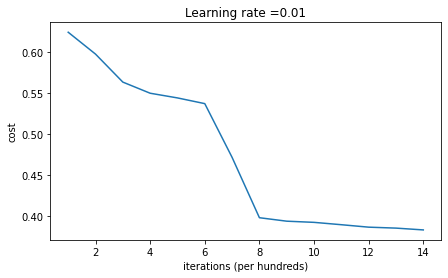

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [33]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

Si ves "inf" como coste después de la iteración 0, esto se debe al redondeo numérico. Una implementación más sofisticada numéricamente lo arreglaría, pero para los propósitos de este cuaderno, no vale la pena preocuparse por ello.

En cualquier caso, ahora has roto la simetría, y esto da una precisión notablemente mejor que antes. El modelo ya no produce todos los 0s. Progreso.

In [34]:
print (predictions_train)
print (predictions_test)

[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


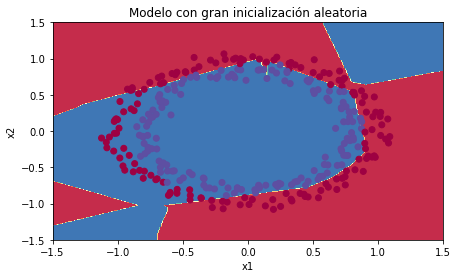

In [35]:
plt.title("Modelo con gran inicialización aleatoria")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Observaciones**:
- El coste empieza siendo muy alto. Esto se debe a que con grandes pesos de valor aleatorio, la última activación (sigmoide) produce resultados que están muy cerca de 0 o 1 para algunos ejemplos, y cuando se equivoca en ese ejemplo incurre en una pérdida muy alta para ese ejemplo. De hecho, cuando $\log(a^{[3]}) = \log(0)$, la pérdida va al infinito.
- Una mala inicialización puede llevar a la desaparición/explosión de los gradientes, lo que también ralentiza el algoritmo de optimización. 
- Si entrenas esta red durante más tiempo verás mejores resultados, pero inicializar con números aleatorios demasiado grandes ralentiza la optimización.

<font color='pink'>
    
**En resumen**:
- Inicializar los pesos con valores aleatorios muy grandes no funciona bien. 
- Inicializar con valores aleatorios pequeños debería funcionar mejor. La pregunta importante es, ¿qué tan pequeños deben ser estos valores aleatorios? ¡Vamos a averiguarlo a continuación!

<font color='green'>    
    
**Lectura opcional:**


La principal diferencia entre la variable gaussiana (`numpy.random.randn()`) y la variable aleatoria uniforme es la distribución de los números aleatorios generados:

- numpy.random.rand() produce números en una [distribución uniforme](https://raw.githubusercontent.com/jahnog/deeplearning-notes/master/Course2/images/rand.jpg).
- y numpy.random.randn() produce números en una [distribución normal](https://raw.githubusercontent.com/jahnog/deeplearning-notes/master/Course2/images/randn.jpg).

Cuando se usa para la inicialización de pesos, randn() ayuda a que la mayoría de los pesos eviten estar cerca de los extremos, asignando la mayoría de ellos en el centro del rango.

Una forma intuitiva de verlo es, por ejemplo, si tomas la [función de activación sigmoide()](https://raw.githubusercontent.com/jahnog/deeplearning-notes/master/Course2/images/sigmoid.jpg).

Recordarás que la pendiente cerca de 0 o cerca de 1 es extremadamente pequeña, por lo que los pesos cerca de esos extremos convergerán mucho más lentamente a la solución, y tener la mayoría de ellos cerca del centro acelerará la convergencia.

<a name='6'></a>
## 6 - He Initialization

Por último, pruebe la "Inicialización de He"; se llama así por el primer autor de He et al., 2015. ( Si has oído hablar de la "inicialización de Xavier", esto es similar, excepto que la inicialización de Xavier utiliza un factor de escala para los pesos $W^{[l]}$ de `sqrt(1./layers_dims[l-1])` donde la inicialización de He utilizaría `sqrt(2./layers_dims[l-1])`).

<a name='ex-3'></a>
### Exercise 3 - initialize_parameters_he

Implementa la siguiente función para inicializar tus parámetros con la inicialización He. Esta función es similar a la anterior `inicializar_parámetros_random(...)`. La única diferencia es que en lugar de multiplicar `np.random.randn(..,..)` por 10, lo multiplicará por $\sqrt{{frac{2}{text{dimensión de la capa anterior}}$, que es lo que recomienda la inicialización He para las capas con una activación ReLU. 

In [36]:
# GRADED FUNCTION: initialize_parameters_he

def initialize_parameters_he(layers_dims):
    """
    Argumentos:
    layer_dims -- array python (lista) que contiene el tamaño de cada capa.
    
    Devuelve:
    parameters -- diccionario python que contiene sus parámetros "W1", "b1", ..., "WL", "bL":
                    W1 -- matriz de pesos de la forma (layers_dims[1], layers_dims[0])
                    b1 -- vector de sesgo de la forma (layers_dims[1], 1)
                    ...
                    WL -- matriz de pesos de la forma (layers_dims[L], layers_dims[L-1])
                    bL -- vector de sesgo de la forma (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 
     
    for l in range(1, L + 1):
        
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * np.sqrt(2. / layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1)) * np.sqrt(2. / layers_dims[l-1])
        
        
    return parameters

In [37]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

initialize_parameters_he_test(initialize_parameters_he)
# parameters

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]
 All tests passed.


**Expected output**

```
W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.] [0.] [0.] [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]
```

Run the following code to train your model on 15,000 iterations using He initialization.

Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893805
Cost after iteration 4000: 0.6082958970572938
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071794
Cost after iteration 7000: 0.3117803464844441
Cost after iteration 8000: 0.23696215330322562
Cost after iteration 9000: 0.1859728720920684
Cost after iteration 10000: 0.15015556280371808
Cost after iteration 11000: 0.12325079292273551
Cost after iteration 12000: 0.09917746546525937
Cost after iteration 13000: 0.08457055954024283
Cost after iteration 14000: 0.07357895962677366


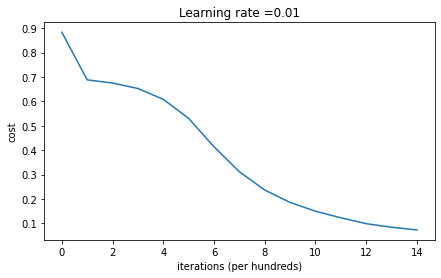

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [38]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

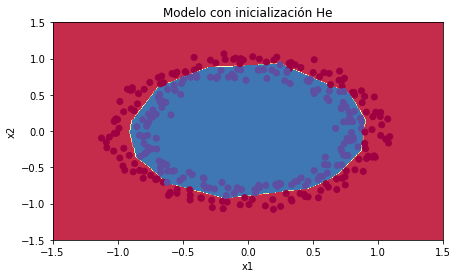

In [39]:
plt.title("Modelo con inicialización He")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Observaciones**:
- El modelo con inicialización He separa muy bien los puntos azules y rojos en un número reducido de iteraciones.


<a name='7'></a>
## 7 - Conclusions

Modelo con inicialización He probado tres tipos diferentes de inicializaciones. Para el mismo número de iteraciones y los mismos hiperparámetros, la comparación es:

<table> 
    <tr>
        <td>
            <b>Model</b>
        </td>
        <td>
            <b>Train accuracy</b>
        </td>
        <td>
            <b>Problem/Comment</b>
        </td>
    </tr>
        <td>
        3-layer NN con inicialización en ceros
        </td>
        <td>
        50%
        </td>
        <td>
        no rompe la simetría
        </td>
    <tr>
        <td>
        3-layer NN con una gran inicialización aleatoria
        </td>
        <td>
        83%
        </td>
        <td>
        pesos demasiado grandes 
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN con la inicialización de He
        </td>
        <td>
        99%
        </td>
        <td>
        método recomendado
        </td>
    </tr>
</table> 

**¡Felicidades**! Has completado este cuaderno sobre Inicialización. 

Aquí hay un resumen rápido de los principales puntos de interés:

<font color='pink'>
    
- Different initializations lead to very different results
- Random initialization is used to break symmetry and make sure different hidden units can learn different things
- Resist initializing to values that are too large!
- He initialization works well for networks with ReLU activations